## Mini Project III

### Do they have credit account? How much do they live in debt?

In [1]:
import pandas as pd
import numpy as np
# import visualize
import matplotlib.pyplot as plt
import seaborn as sns
# import Kmeans from sklearn
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# import DBSCAN
from sklearn.cluster import DBSCAN
# Aglomerative clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
# Cluster hierarchy
import scipy.cluster.hierarchy as sch
from scipy import stats

In [3]:
customer = pd.read_csv("D:\Python(New)\Project\Project_Week_5\Mini_Project_Week_5\clean\customer.csv")

In [4]:
customer_age = customer[['cust_id','age']]

In [5]:
customer_age['age_bin'] = pd.cut(x = customer_age['age'], bins = [13, 20, 40, 60, 90])

C:\Users\quang\AppData\Local\Temp\ipykernel_15512\1278101733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_age['age_bin'] = pd.cut(x = customer_age['age'], bins = [13, 20, 40, 60, 90])


In [6]:
# get age_bin dummy
age_data = pd.get_dummies(customer_age, columns = ['age_bin']).drop(columns = ['cust_id'])
# concatenate with the previous dataframe
customer_age_data = pd.concat([customer_age,age_data], ignore_index=False, axis = 1).drop(columns = ['age'])

In [7]:
customer_age_data

,cust_id,age_bin,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]"
0,1362691,"(40, 60]",0,0,1,0
1,1362487,"(60, 90]",0,0,0,1
2,1363160,"(20, 40]",0,1,0,0
3,1362752,"(40, 60]",0,0,1,0
4,1362548,"(40, 60]",0,0,1,0
...,...,...,...,...,...,...
742,1363324,"(20, 40]",0,1,0,0
743,1362895,"(40, 60]",0,0,1,0
744,1362569,"(40, 60]",0,0,1,0
745,1363364,"(20, 40]",0,1,0,0


In [8]:
credit_account = pd.read_csv("D:\Python(New)\Project\Project_Week_5\Mini_Project_Week_5\clean\credit_account.csv")
credit_customer = pd.merge(credit_account, customer_age_data, how = "inner")

In [9]:
credit_customer['account_active'] = credit_customer['account_active'].replace({'Y':1, 'N':0})

In [10]:
credit_customer['credit_amt'] = credit_customer['ending_balance'] - credit_customer['starting_balance']

In [41]:
credit_data = credit_customer[['age_bin','credit_limit', 'credit_rating' , 'starting_balance', 'ending_balance', 'credit_amt','account_active', 'age_bin_(13, 20]', 'age_bin_(20, 40]', 'age_bin_(40, 60]', 'age_bin_(60, 90]']]
credit_data

,age_bin,credit_limit,credit_rating,starting_balance,ending_balance,credit_amt,account_active,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]"
0,"(20, 40]",1000,0,657.46,286.69,-370.77,1,0,1,0,0
1,"(60, 90]",3000,0,0.00,1548.23,1548.23,1,0,0,0,1
2,"(40, 60]",6700,0,6965.25,68.68,-6896.57,1,0,0,1,0
3,"(40, 60]",2400,0,2302.14,0.00,-2302.14,0,0,0,1,0
4,"(13, 20]",1000,0,0.00,1000.00,1000.00,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
463,"(20, 40]",3000,0,1783.86,1785.97,2.11,0,0,1,0,0
464,"(40, 60]",1500,0,1193.89,1500.00,306.11,1,0,0,1,0
465,"(40, 60]",3000,0,0.00,1218.94,1218.94,1,0,0,1,0
466,"(40, 60]",9200,0,0.00,9200.00,9200.00,1,0,0,1,0


In [42]:
# scale data
credit_data.dropna(inplace = True)
credit_col = ['credit_limit', 'credit_rating', 'starting_balance', 'ending_balance', 'credit_amt','account_active', 'age_bin_(13, 20]', 'age_bin_(20, 40]', 'age_bin_(40, 60]', 'age_bin_(60, 90]']
credit_scaled = ['credit_limit_scaled', 'credit_rating_scaled', 'starting_balance_scaled', 'ending_balance_scaled', 'credit_amt_scaled','account_active_scaled', 'age_bin_(13, 20]_scaled', 'age_bin_(20, 40]_scaled', 'age_bin_(40, 60]_scaled', 'age_bin_(60, 90]_scaled']
scaler = StandardScaler()
credit_data[credit_scaled] = scaler.fit_transform(credit_data[credit_col])
credit_data.head()

C:\Users\quang\AppData\Local\Temp\ipykernel_15512\907814785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_data.dropna(inplace = True)
C:\Users\quang\AppData\Local\Temp\ipykernel_15512\907814785.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_data[credit_scaled] = scaler.fit_transform(credit_data[credit_col])
C:\Users\quang\AppData\Local\Temp\ipykernel_15512\907814785.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,age_bin,credit_limit,credit_rating,starting_balance,ending_balance,credit_amt,account_active,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]",...,credit_limit_scaled,credit_rating_scaled,starting_balance_scaled,ending_balance_scaled,credit_amt_scaled,account_active_scaled,"age_bin_(13, 20]_scaled","age_bin_(20, 40]_scaled","age_bin_(40, 60]_scaled","age_bin_(60, 90]_scaled"
0,"(20, 40]",1000,0,657.46,286.69,-370.77,1,0,1,0,...,-0.719083,-0.217739,-0.284978,-0.659658,-0.211703,0.326164,-0.379808,1.530639,-0.794142,-0.481227
1,"(60, 90]",3000,0,0.00,1548.23,1548.23,1,0,0,0,...,0.153776,-0.217739,-0.687216,0.266849,0.727842,0.326164,-0.379808,-0.653322,-0.794142,2.078024
2,"(40, 60]",6700,0,6965.25,68.68,-6896.57,1,0,0,1,...,1.768566,-0.217739,3.574165,-0.819770,-3.406741,0.326164,-0.379808,-0.653322,1.259220,-0.481227
3,"(40, 60]",2400,0,2302.14,0.00,-2302.14,0,0,0,1,...,-0.108082,-0.217739,0.721247,-0.870210,-1.157303,-3.065942,-0.379808,-0.653322,1.259220,-0.481227
4,"(13, 20]",1000,0,0.00,1000.00,1000.00,1,1,0,0,...,-0.719083,-0.217739,-0.687216,-0.135785,0.459428,0.326164,2.632908,-0.653322,-0.794142,-0.481227


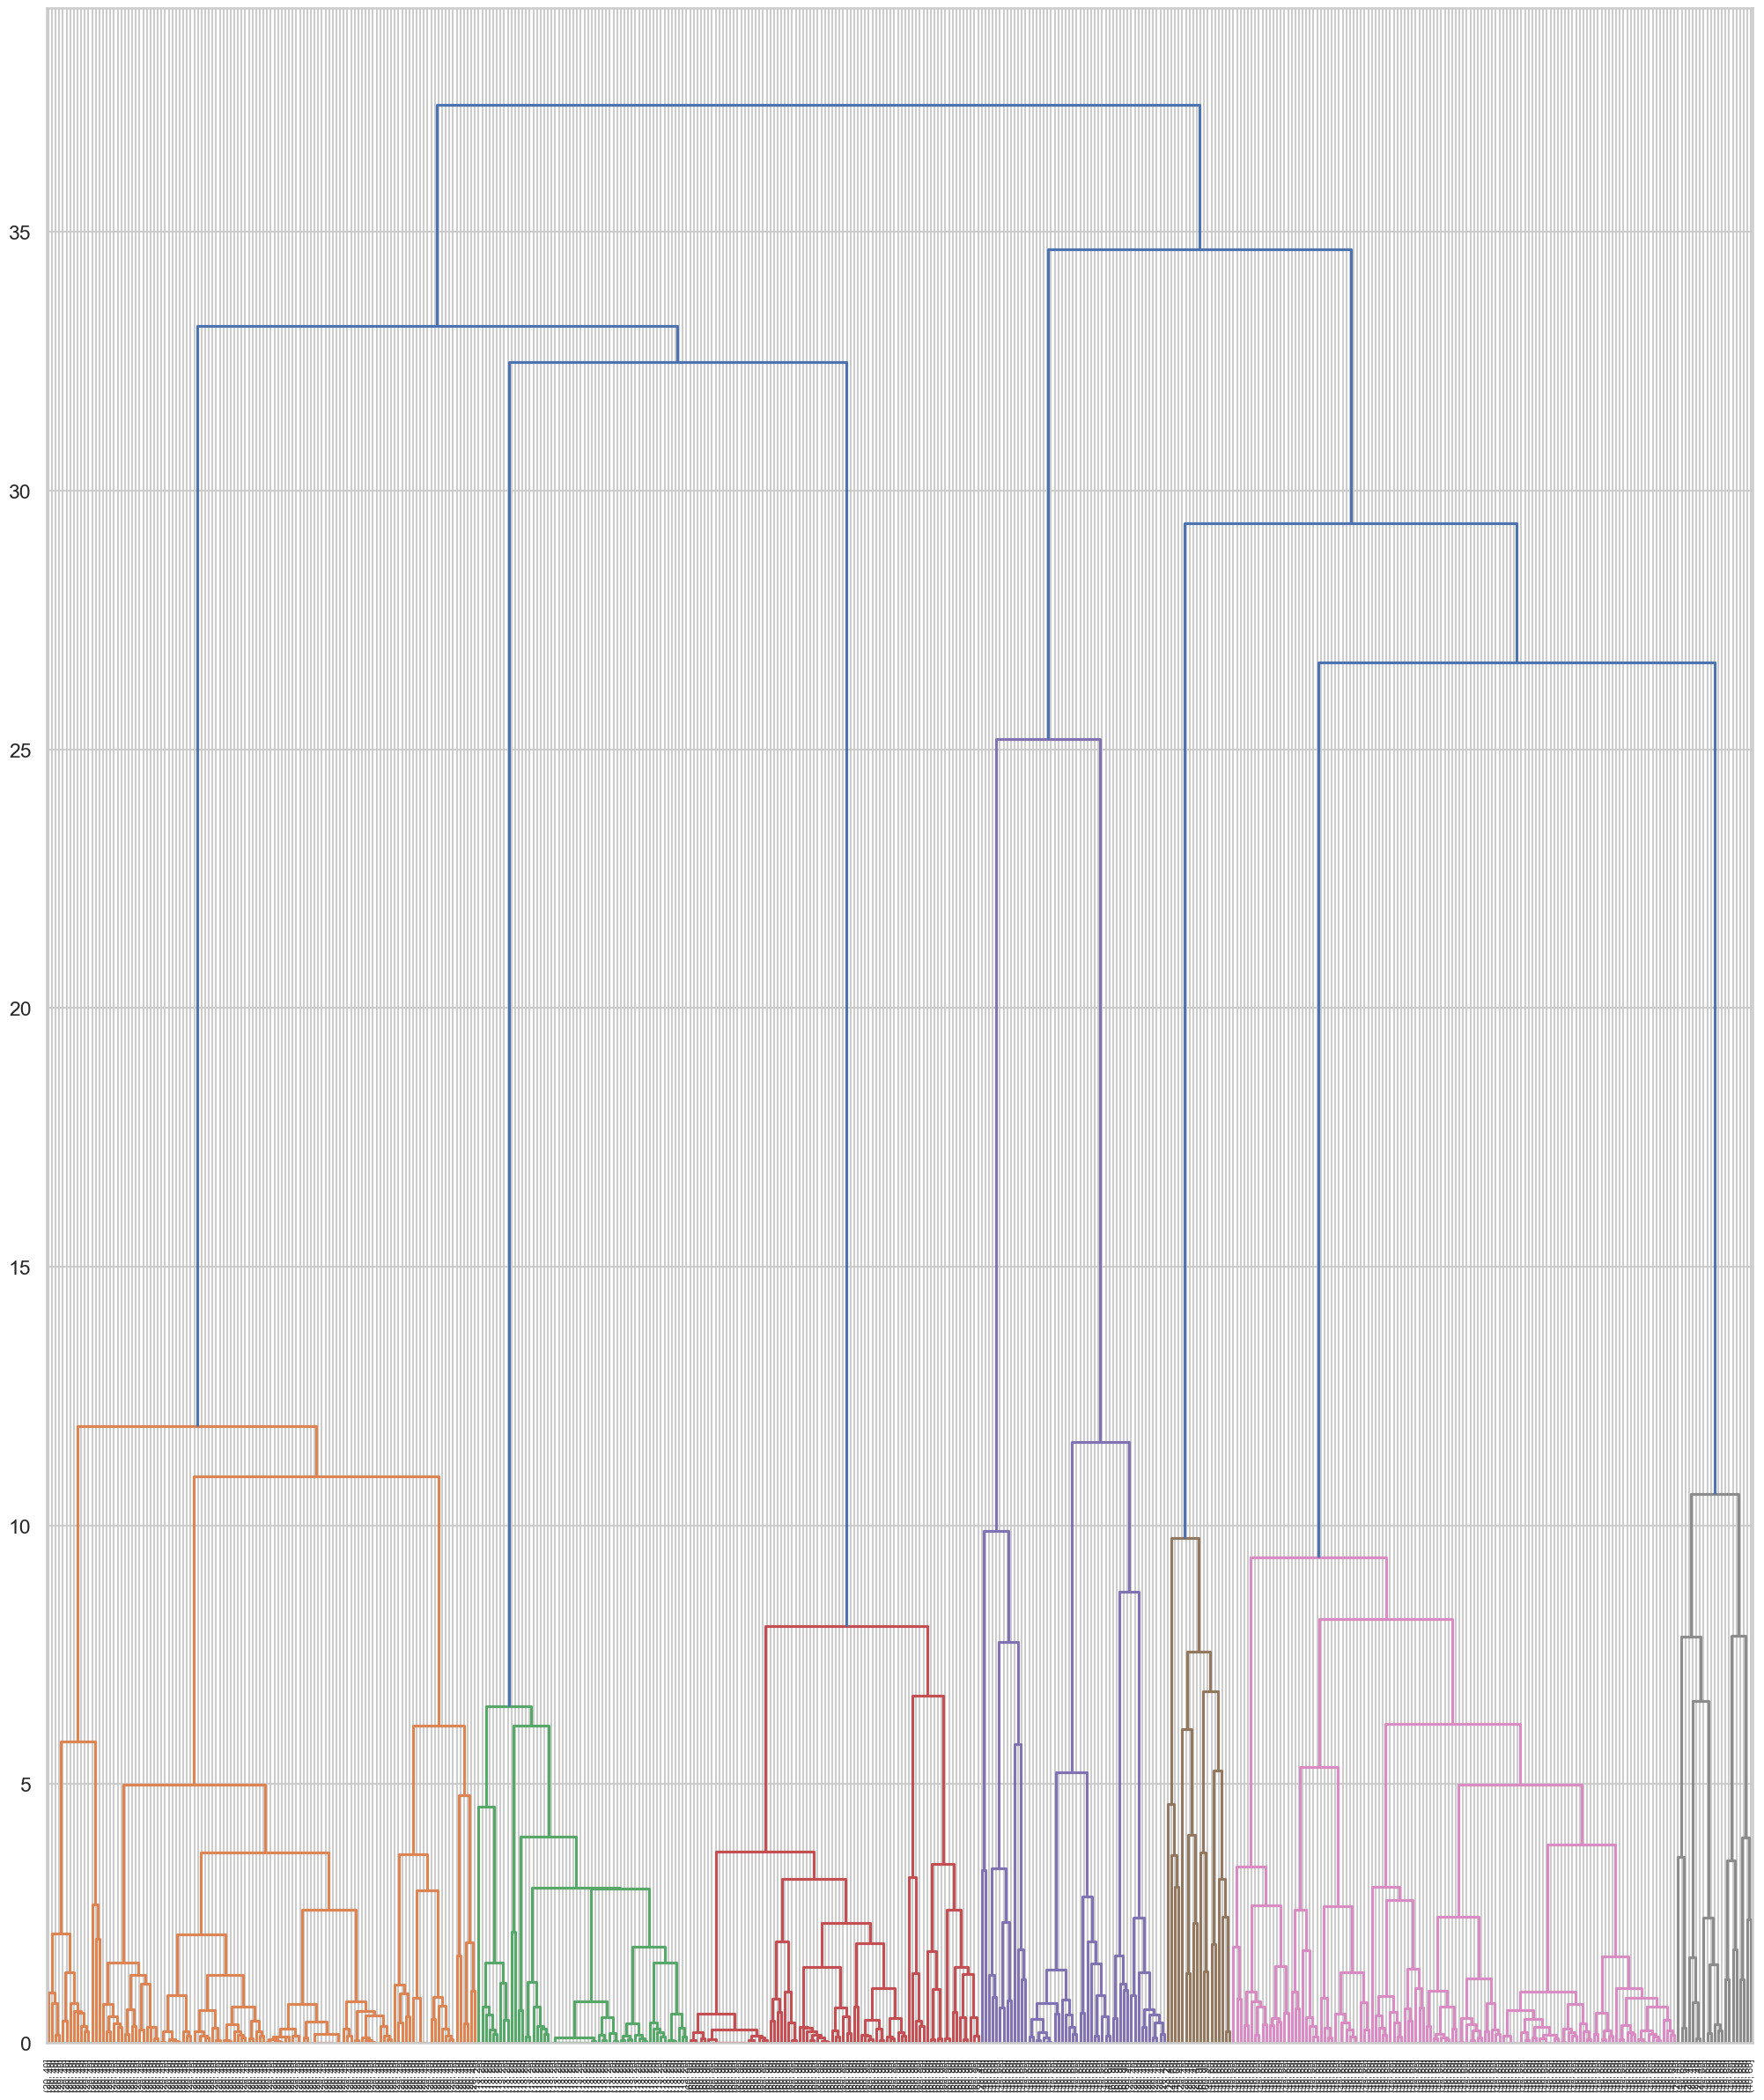

In [43]:
linkage_type = 'ward'
cluster_credit = credit_data.iloc[:, 11:]
linkage_matrix = linkage(cluster_credit, linkage_type)

plt.figure(figsize=(25,30))
labels = list(credit_data['age_bin'])

# plot using 'dendrogram()'
dendrogram(linkage_matrix, labels=labels,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.)

plt.show()

In [92]:
#Run Clustering
model = AgglomerativeClustering(n_clusters = 3)
model.fit(cluster_credit)

AgglomerativeClustering(n_clusters=3)

In [93]:
#Adding cluster column from output of model
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
cluster_credit = credit_data.iloc[:, 11:]

clustering_model.fit(cluster_credit)
label = clustering_model.labels_
print(label)

credit_data['cluster'] = label
credit_data.dropna(inplace = True)
credit_data.head()

[1 2 0 0 2 2 0 0 1 2 2 0 0 2 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 2 1 1 0
 0 0 0 2 2 0 2 1 1 0 0 0 1 2 2 2 1 1 0 2 1 2 0 2 1 2 0 1 0 0 0 0 0 1 0 0 2
 0 2 0 0 2 2 1 0 0 0 2 0 2 0 0 2 1 0 0 2 2 1 0 1 2 1 0 0 1 1 0 2 0 1 1 2 0
 0 2 1 2 0 1 1 0 0 0 0 2 0 0 1 0 1 0 2 2 1 1 0 2 2 2 0 2 2 0 2 1 1 0 0 2 0
 2 0 0 2 0 2 0 2 0 0 2 0 0 0 2 2 1 2 1 0 2 0 1 2 2 0 2 2 2 1 2 0 1 0 0 2 0
 0 1 0 2 0 2 2 1 0 0 1 0 1 1 0 1 0 0 2 2 1 1 0 0 0 1 2 0 2 2 0 0 0 0 0 0 1
 1 0 1 1 2 0 1 2 2 2 1 2 2 0 1 2 0 1 1 1 2 0 1 0 2 0 1 0 0 2 0 2 0 0 0 2 1
 1 0 0 0 0 0 2 2 1 1 0 2 0 0 0 1 2 0 0 0 0 2 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0
 0 2 2 1 0 1 1 0 2 0 2 2 2 2 2 0 2 2 0 1 0 1 0 0 0 0 1 0 2 2 0 1 0 2 0 0 2
 0 2 1 1 1 1 0 0 2 2 1 0 0 2 2 2 1 0 0 2 2 2 2 1 1 1 0 2 0 1 2 0 2 0 2 2 2
 0 0 2 0 0 0 2 2 2 0 1 0 0 1 2 0 1 1 2 0 0 0 2 0 0 2 1 0 0 0 2 0 1 1 2 0 1
 1 0 2 0 2 1 1 2 0 0 2 2 1 1 0 0 1 0 0 0 0 1 1 1 2 2 0 1 2 2 0 2 0 0 1 0 1
 0 0 2 0 2 0 1 1 1 2 0 2 2 1 1 0 0 0 0 0 0 0 0 2]


,age_bin,credit_limit,credit_rating,starting_balance,ending_balance,credit_amt,account_active,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]",...,credit_rating_scaled,starting_balance_scaled,ending_balance_scaled,credit_amt_scaled,account_active_scaled,"age_bin_(13, 20]_scaled","age_bin_(20, 40]_scaled","age_bin_(40, 60]_scaled","age_bin_(60, 90]_scaled",cluster
0,"(20, 40]",1000,0,657.46,286.69,-370.77,1,0,1,0,...,-0.217739,-0.284978,-0.659658,-0.211703,0.326164,-0.379808,1.530639,-0.794142,-0.481227,1
1,"(60, 90]",3000,0,0.00,1548.23,1548.23,1,0,0,0,...,-0.217739,-0.687216,0.266849,0.727842,0.326164,-0.379808,-0.653322,-0.794142,2.078024,2
2,"(40, 60]",6700,0,6965.25,68.68,-6896.57,1,0,0,1,...,-0.217739,3.574165,-0.819770,-3.406741,0.326164,-0.379808,-0.653322,1.259220,-0.481227,0
3,"(40, 60]",2400,0,2302.14,0.00,-2302.14,0,0,0,1,...,-0.217739,0.721247,-0.870210,-1.157303,-3.065942,-0.379808,-0.653322,1.259220,-0.481227,0
4,"(13, 20]",1000,0,0.00,1000.00,1000.00,1,1,0,0,...,-0.217739,-0.687216,-0.135785,0.459428,0.326164,2.632908,-0.653322,-0.794142,-0.481227,2


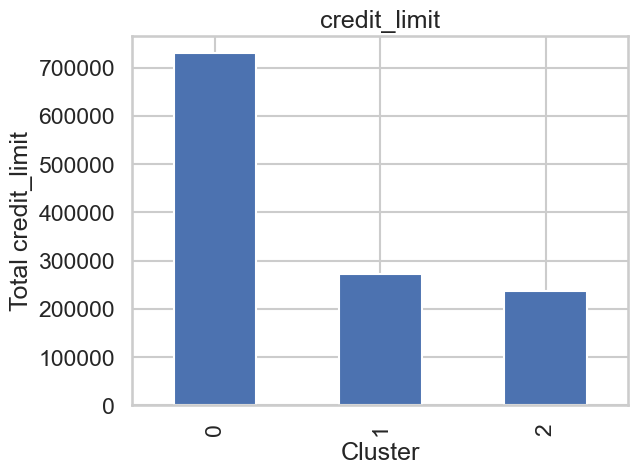

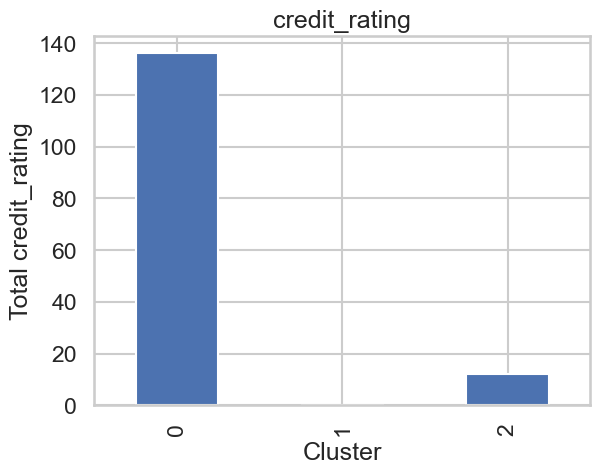

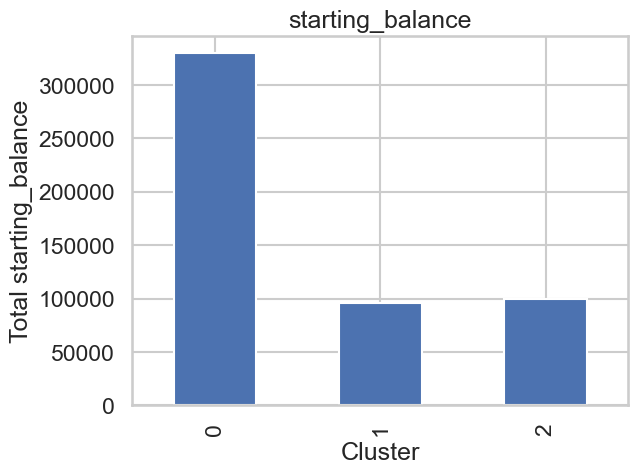

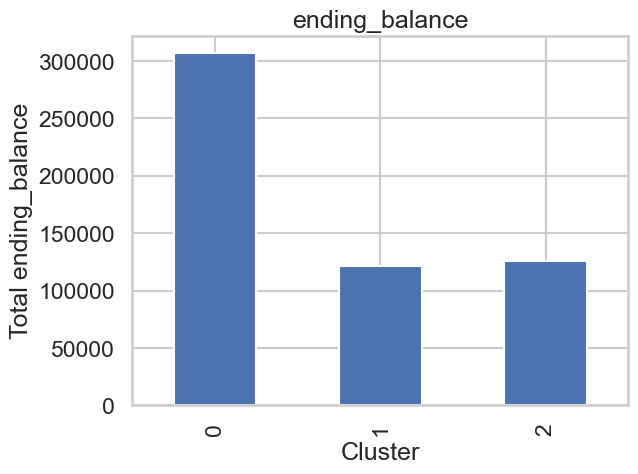

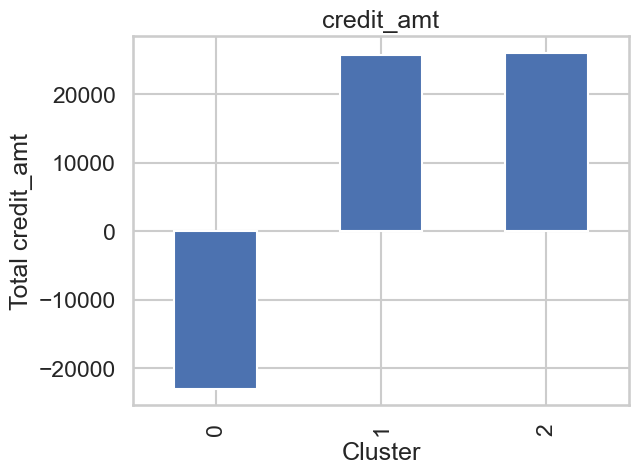

In [94]:
# Visualize the results by total
features = list(credit_data.columns)[1:6]
for x in features:
  plt.figure()
  credit_data.groupby(["cluster"])[x].sum().plot(kind="bar", ylabel='Total ' + x , xlabel='Cluster', figsize=(10, 6), subplots=True)
  plt.show()

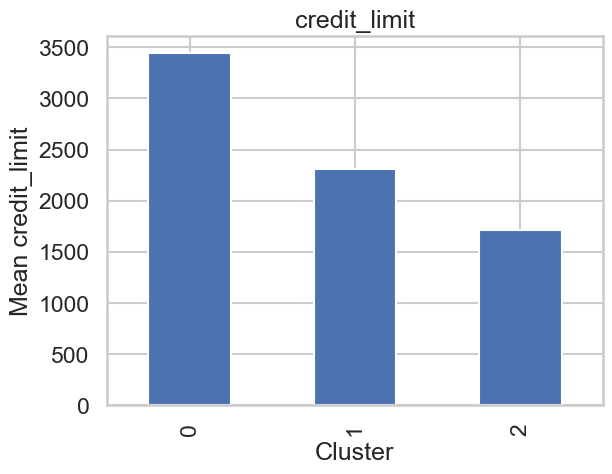

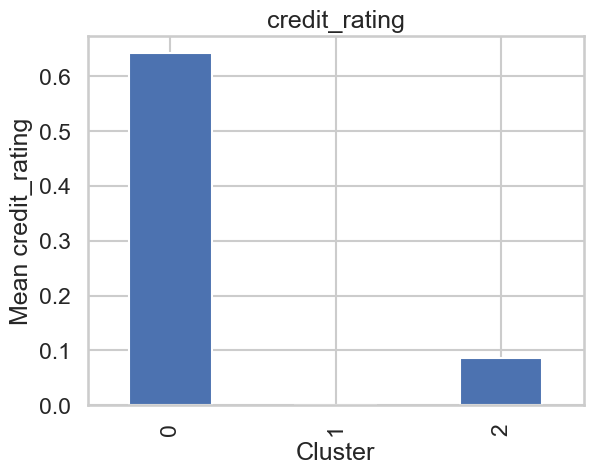

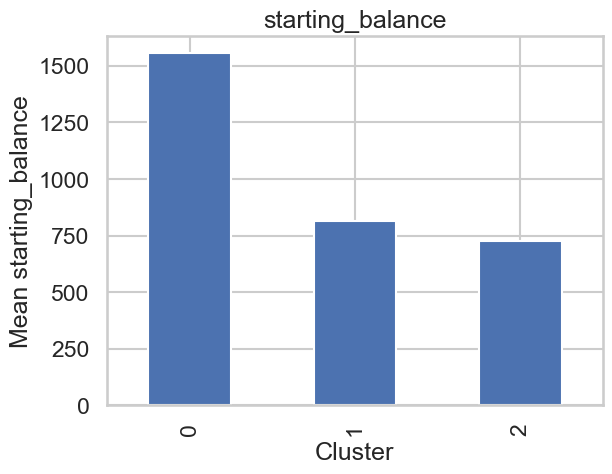

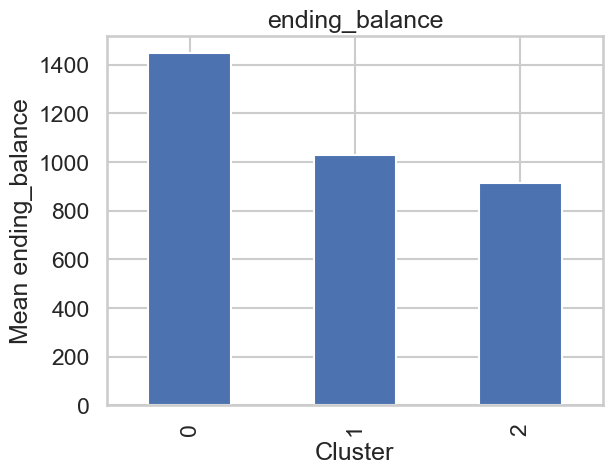

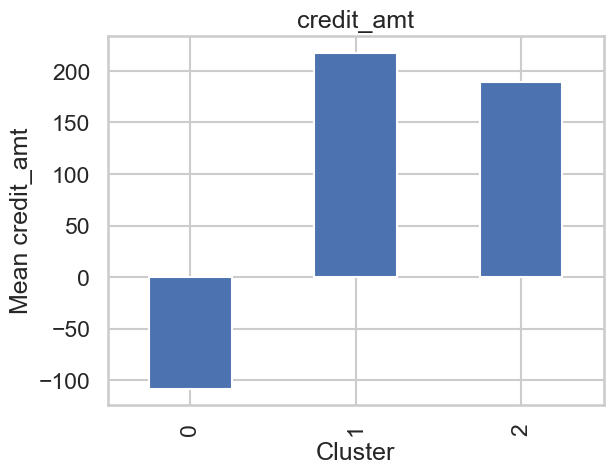

In [95]:
# Visualize the results by mean
features = list(credit_data.columns)[1:6]
for x in features:
  plt.figure()
  credit_data.groupby(["cluster"])[x].mean().plot(kind="bar", ylabel='Mean ' + x , xlabel='Cluster', figsize=(10, 6), subplots=True)
  plt.show()

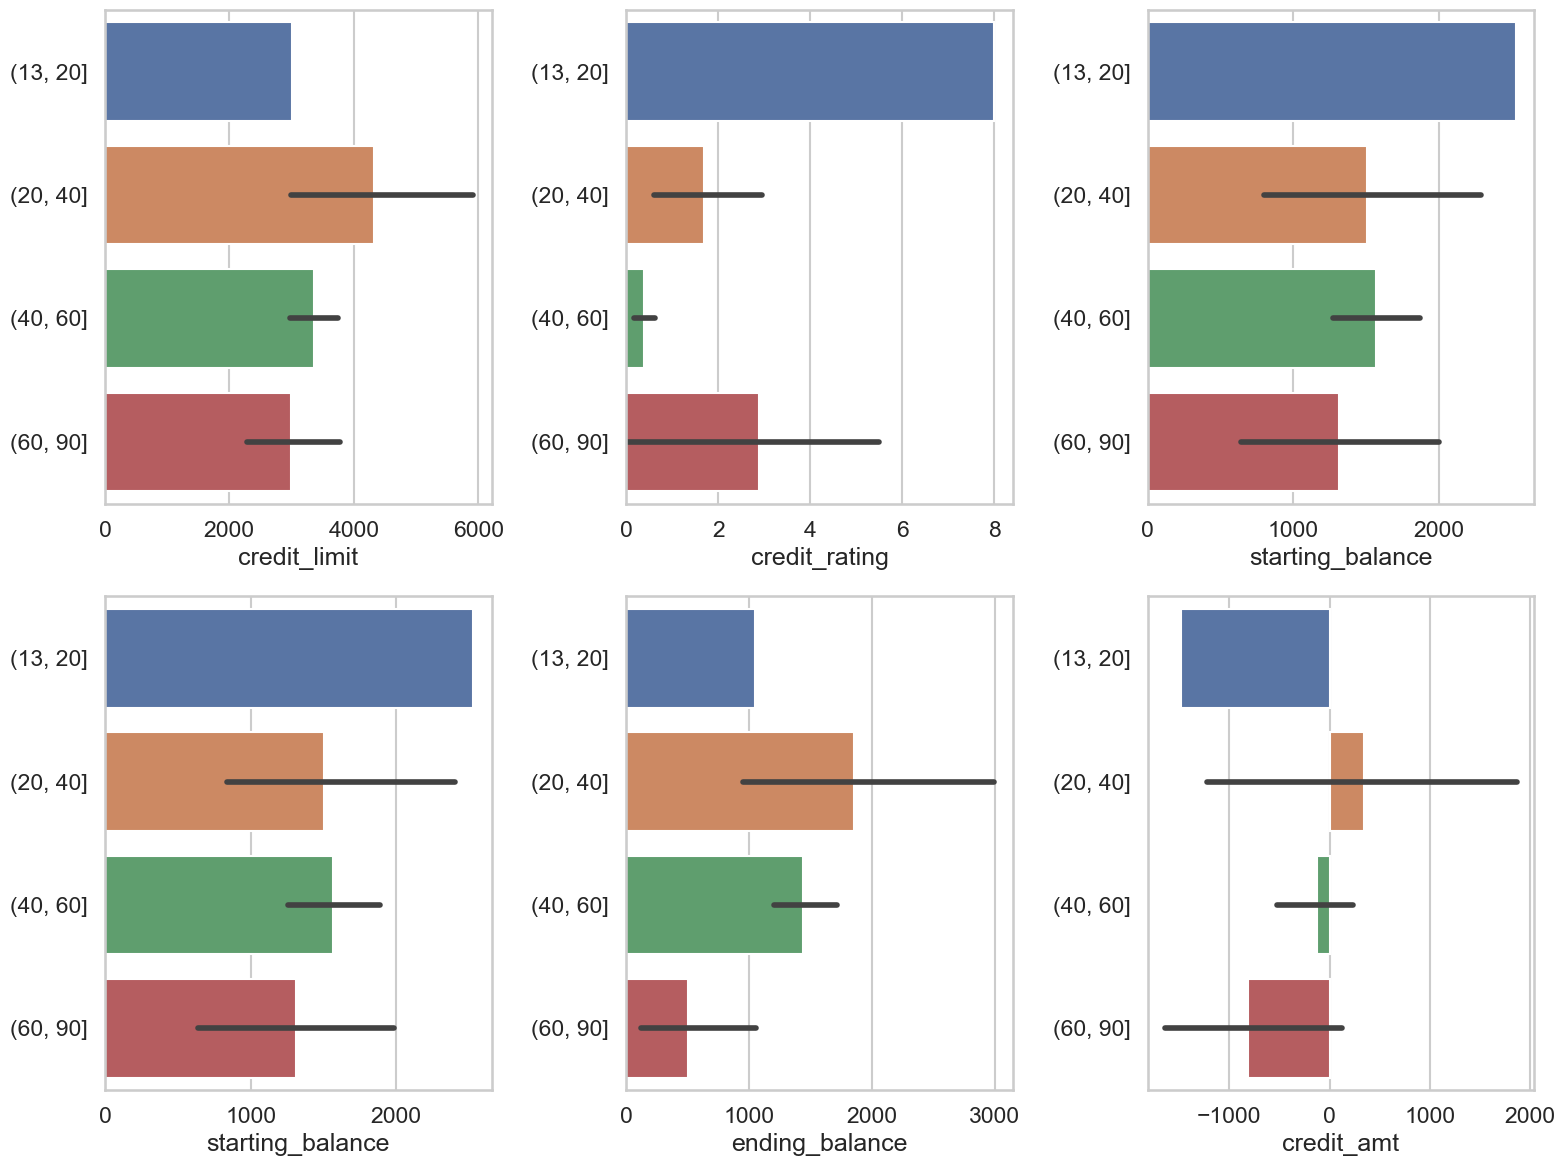

In [96]:
# Cluster 0
cluster0 = credit_data[credit_data['cluster'] == 0.0]
fig, axs = plt.subplots(2, 3 , figsize=(16, 12))
sns.set(style='whitegrid', context='talk')
for i in range(2):
    for j in range(3):
        cluster_1 = cluster0.sort_values(by=features[i*2 + j], ascending=False)
        sns.barplot(y = 'age_bin', x=features[i*2 + j], data=cluster_1, ax=axs[i, j])
        axs[i, j].set_ylabel('')

fig.tight_layout()

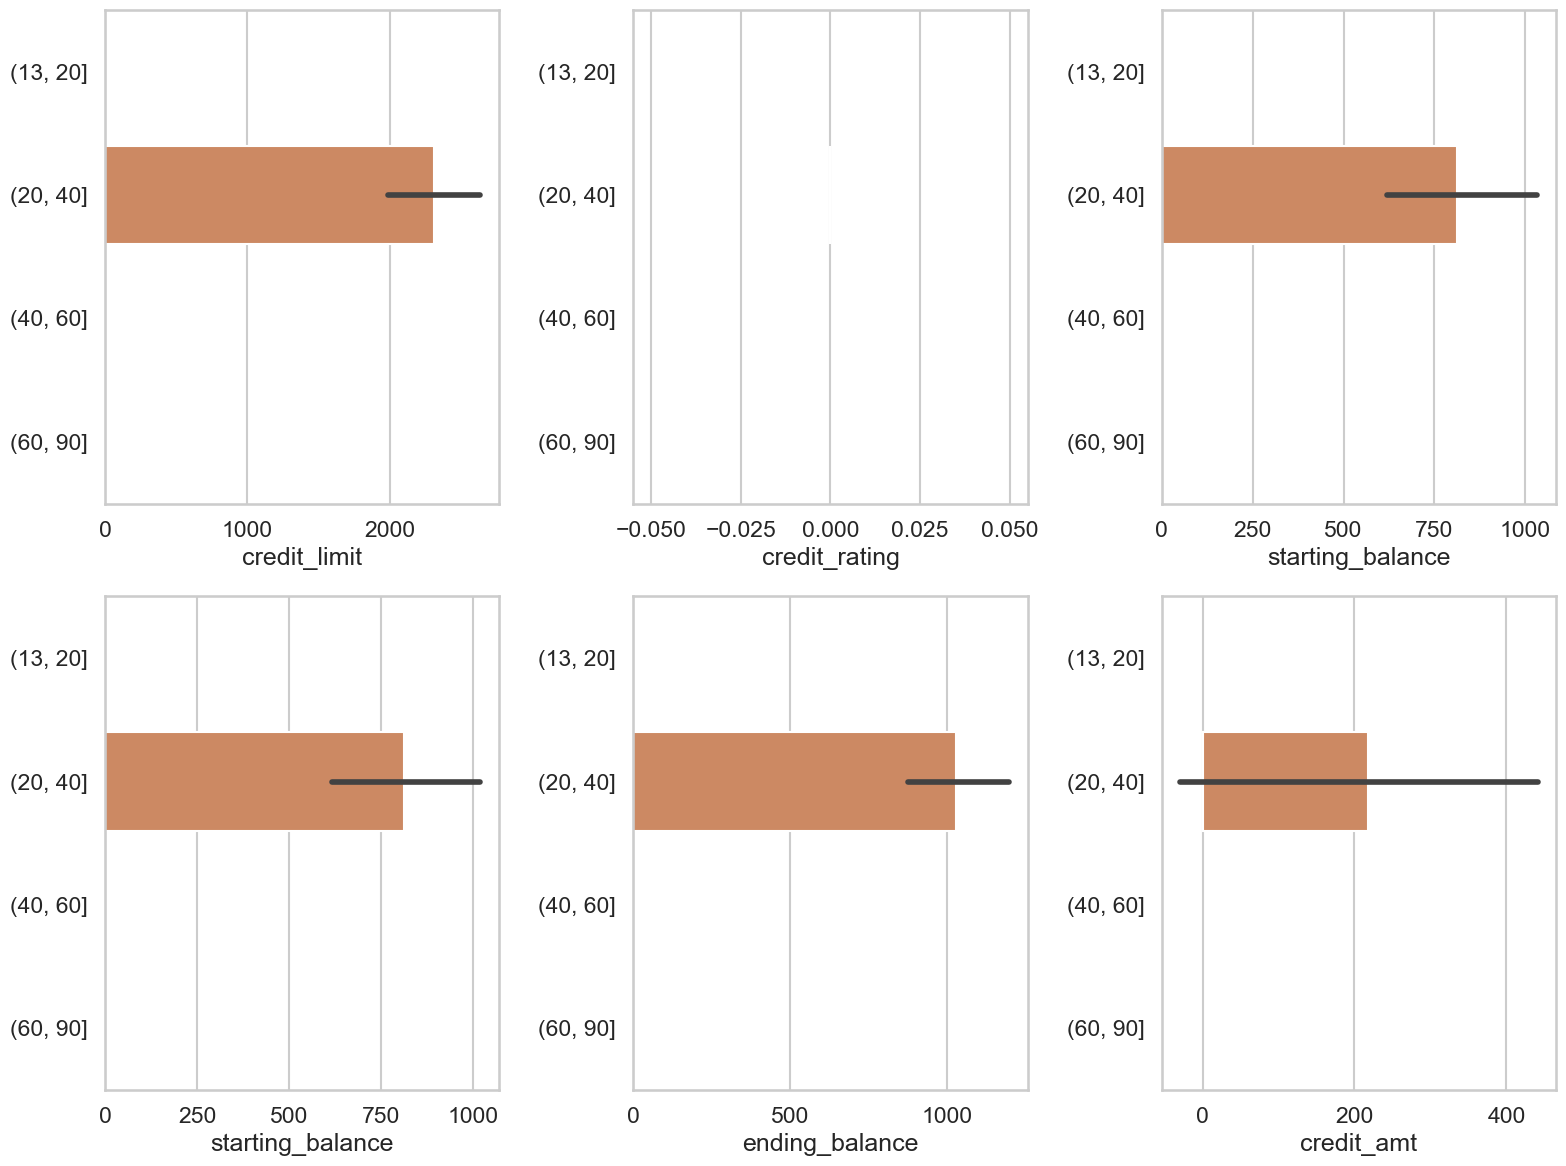

In [97]:
# Cluster 1
cluster1 = credit_data[credit_data['cluster'] == 1.0]
fig, axs = plt.subplots(2, 3, figsize=(16, 12))
sns.set(style='whitegrid', context='talk')
for i in range(2):
    for j in range(3):
        cluster_2 = cluster1.sort_values(by=features[i*2 + j], ascending=False)
        sns.barplot(y = 'age_bin', x=features[i*2 + j], data=cluster_2, ax=axs[i, j])
        axs[i, j].set_ylabel('')

fig.tight_layout()

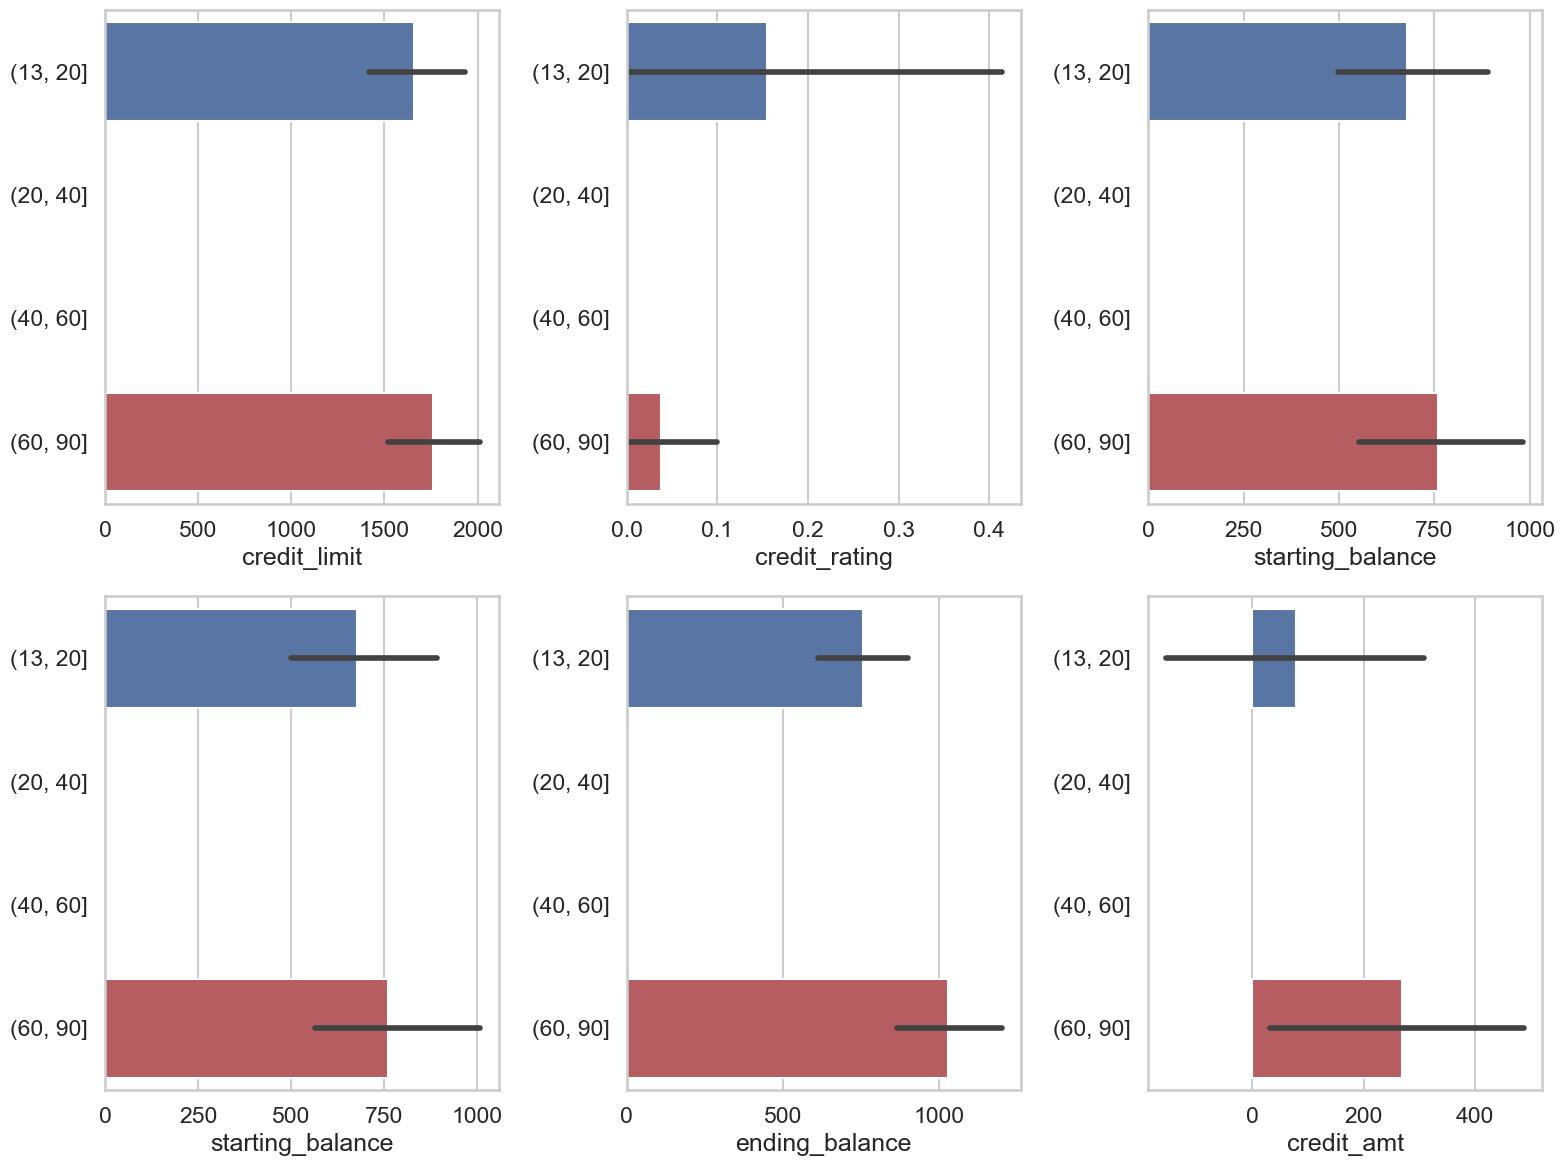

In [98]:
# Cluster 2
cluster2 = credit_data[credit_data['cluster'] == 2.0]
fig, axs = plt.subplots(2, 3, figsize=(16, 12))
sns.set(style='whitegrid', context='talk')
for i in range(2):
    for j in range(3):
        cluster_3 = cluster2.sort_values(by=features[i*2 + j], ascending=False)
        sns.barplot(y = 'age_bin', x=features[i*2 + j], data=cluster_3, ax=axs[i, j])
        axs[i, j].set_ylabel('')

fig.tight_layout()

In [99]:
from sklearn.preprocessing import MinMaxScaler
min_max_scale = MinMaxScaler()

In [100]:
credit_data

,age_bin,credit_limit,credit_rating,starting_balance,ending_balance,credit_amt,account_active,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]",...,credit_rating_scaled,starting_balance_scaled,ending_balance_scaled,credit_amt_scaled,account_active_scaled,"age_bin_(13, 20]_scaled","age_bin_(20, 40]_scaled","age_bin_(40, 60]_scaled","age_bin_(60, 90]_scaled",cluster
0,"(20, 40]",1000,0,657.46,286.69,-370.77,1,0,1,0,...,-0.217739,-0.284978,-0.659658,-0.211703,0.326164,-0.379808,1.530639,-0.794142,-0.481227,1
1,"(60, 90]",3000,0,0.00,1548.23,1548.23,1,0,0,0,...,-0.217739,-0.687216,0.266849,0.727842,0.326164,-0.379808,-0.653322,-0.794142,2.078024,2
2,"(40, 60]",6700,0,6965.25,68.68,-6896.57,1,0,0,1,...,-0.217739,3.574165,-0.819770,-3.406741,0.326164,-0.379808,-0.653322,1.259220,-0.481227,0
3,"(40, 60]",2400,0,2302.14,0.00,-2302.14,0,0,0,1,...,-0.217739,0.721247,-0.870210,-1.157303,-3.065942,-0.379808,-0.653322,1.259220,-0.481227,0
4,"(13, 20]",1000,0,0.00,1000.00,1000.00,1,1,0,0,...,-0.217739,-0.687216,-0.135785,0.459428,0.326164,2.632908,-0.653322,-0.794142,-0.481227,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,"(20, 40]",3000,0,1783.86,1785.97,2.11,0,0,1,0,...,-0.217739,0.404160,0.441452,-0.029140,-3.065942,-0.379808,1.530639,-0.794142,-0.481227,0
464,"(40, 60]",1500,0,1193.89,1500.00,306.11,1,0,0,1,...,-0.217739,0.043213,0.231428,0.119699,0.326164,-0.379808,-0.653322,1.259220,-0.481227,0
465,"(40, 60]",3000,0,0.00,1218.94,1218.94,1,0,0,1,...,-0.217739,-0.687216,0.025010,0.566621,0.326164,-0.379808,-0.653322,1.259220,-0.481227,0
466,"(40, 60]",9200,0,0.00,9200.00,9200.00,1,0,0,1,...,-0.217739,-0.687216,5.886505,4.474156,0.326164,-0.379808,-0.653322,1.259220,-0.481227,0


In [101]:
credit_radar = credit_data[['cluster','credit_limit', 'credit_rating', 'starting_balance', 'ending_balance', 'credit_amt','account_active', 'age_bin_(13, 20]', 'age_bin_(20, 40]', 'age_bin_(40, 60]', 'age_bin_(60, 90]']]

In [102]:
credit_col = ['credit_limit', 'credit_rating', 'starting_balance', 'ending_balance', 'credit_amt','account_active', 'age_bin_(13, 20]', 'age_bin_(20, 40]', 'age_bin_(40, 60]', 'age_bin_(60, 90]']
credit_radar[credit_col] = min_max_scale.fit_transform(credit_radar[credit_col])
credit_radar

C:\Users\quang\AppData\Local\Temp\ipykernel_15512\1611191105.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cluster,credit_limit,credit_rating,starting_balance,ending_balance,credit_amt,account_active,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]"
0,1,0.000000,0.0,0.057699,0.030178,0.484110,1.0,0.0,1.0,0.0,0.0
1,2,0.122699,0.0,0.000000,0.162972,0.584406,1.0,0.0,0.0,0.0,1.0
2,0,0.349693,0.0,0.611273,0.007229,0.143043,1.0,0.0,0.0,1.0,0.0
3,0,0.085890,0.0,0.202037,0.000000,0.383168,0.0,0.0,0.0,1.0,0.0
4,2,0.000000,0.0,0.000000,0.105263,0.555753,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
463,0,0.122699,0.0,0.156552,0.187997,0.503599,0.0,0.0,1.0,0.0,0.0
464,0,0.030675,0.0,0.104776,0.157895,0.519487,1.0,0.0,0.0,1.0,0.0
465,0,0.122699,0.0,0.000000,0.128309,0.567196,1.0,0.0,0.0,1.0,0.0
466,0,0.503067,0.0,0.000000,0.968421,0.984321,1.0,0.0,0.0,1.0,0.0


In [103]:
credit_radar = credit_radar.groupby(['cluster']).mean().reset_index()
credit_radar

,cluster,credit_limit,credit_rating,starting_balance,ending_balance,credit_amt,account_active,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]"
0,0,0.149757,0.064151,0.136491,0.152324,0.497834,0.792453,0.004717,0.103774,0.853774,0.037736
1,1,0.080275,0.000000,0.071326,0.108483,0.514875,1.000000,0.000000,1.000000,0.000000,0.000000
2,2,0.044101,0.008696,0.063636,0.096214,0.513363,0.992754,0.420290,0.000000,0.000000,0.579710


In [104]:
import plotly.graph_objects as go
def plot_radar(data):
    fig = go.Figure()
    num_cluster = credit_radar['cluster'].max() + 1
    categories = list(credit_radar.columns)[1:11]
    
    for i in range(num_cluster):
        r = credit_radar.iloc[i,1:].values
        fig.add_trace(go.Scatterpolar(
            r = r,
            theta = categories,
            fill = 'toself',
            name = f'Cluster: {i}',
            opacity = 0.5
        ))
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0,1])),showlegend=True)
    fig.show()

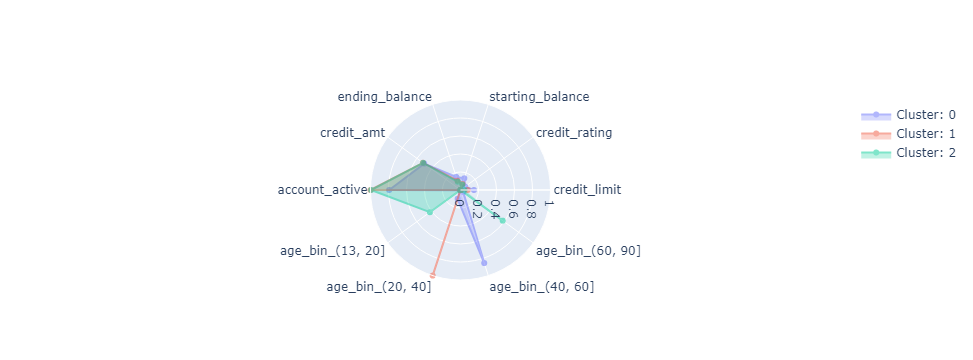

In [105]:
plot_radar(credit_data)